In [12]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [15]:
dir="C:/Users/mealiy001/OneDrive/OneDrive - Universität Bayreuth/PhD/geophysics/"

In [ ]:
#data = ert.load(dir + '11Aug/nuna_a32_transect_long.dat')
#data.save(dir + '11Aug/nuna_a32_transect_long.txt', "a b m n err rhoa")

13/08/25 - 18:58:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [2]:
#data = ert.load(dir + 'tuk_e20_h1_with_errmodel.txt')
data = ert.load('//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/tuk_e20_h1.txt')

In [3]:
data['r'] = data['u']/data['i']


In [4]:
print(max(data["err"]))

0.02850018976


Slope: 0.0795924546851002
Intercept: -0.0011504442080118144


Text(0, 0.5, 'err')

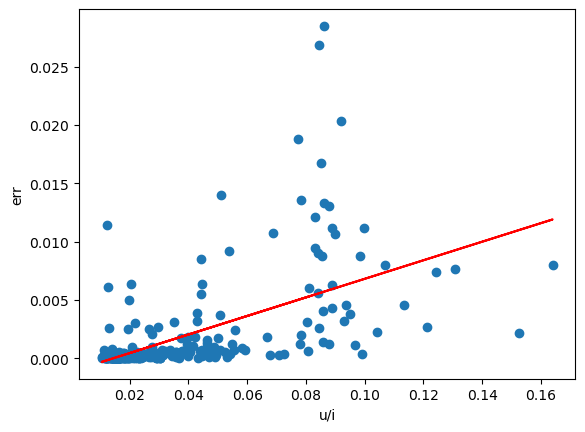

In [6]:
x = data['u']
y = data['err']

# Fit a line (degree 1 polynomial)
slope, intercept = np.polyfit(x, y, 1)

print("Slope:", slope)
print("Intercept:", intercept)

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='red', label='Fitted line')
plt.xlabel('u/i')
plt.ylabel('err')

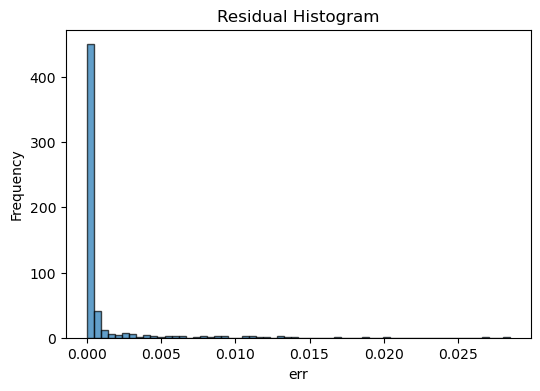

In [7]:
plt.figure(figsize=(6,4))
plt.hist(data['err'], bins=60, edgecolor='k', alpha=0.7)
plt.xlabel('err')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [30]:
data.remove(data['err']>=0.02)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19c0ae1a790>)

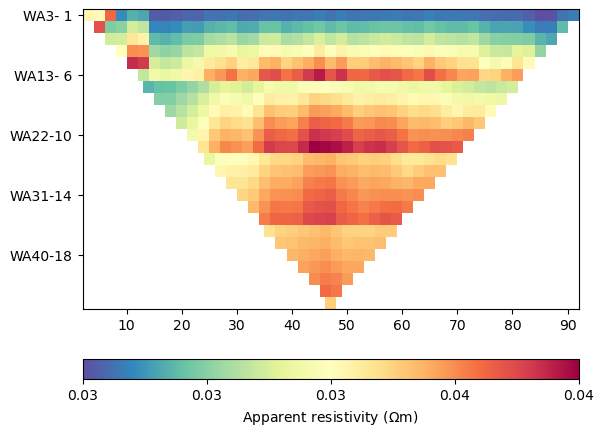

In [9]:
ert.showData(data,data["err"])

In [8]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=1e-4)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c952c9f590>)

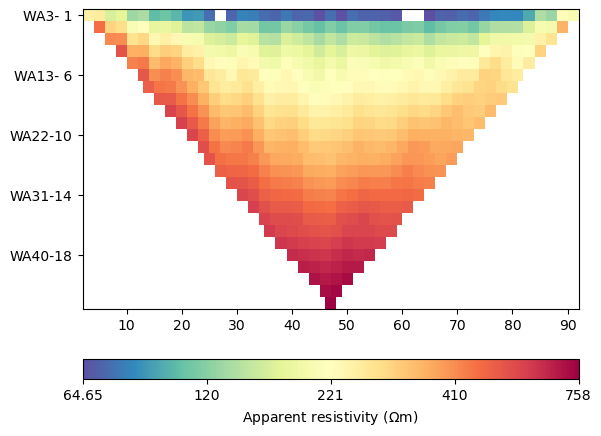

In [34]:
ert.showData(data)

In [ ]:
data["k"] = ert.createGeometricFactors(data)


29/10/25 - 10:20:48 - pyGIMLi - INFO - Save RVector binary
29/10/25 - 10:20:48 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4137400556968780551


In [16]:
alt = pd.read_csv(dir + 'tuk_e20_h1_al.csv', skiprows=1)
alt = alt.to_numpy()

xy = alt
x = xy[0:25, 0] * 2 - 2
y = xy[0:25, 1] / -100


df_out = pd.DataFrame({"x": x, "y": y})

In [182]:
x


array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84, 88, 92, 96], dtype=int64)

In [183]:
y

array([-0.4 , -0.51, -0.5 , -0.68, -0.88, -1.01, -1.21, -1.09, -1.18,
       -1.17, -1.13, -1.14, -1.16, -1.16, -1.5 , -1.42, -1.5 , -1.08,
       -1.19, -1.09, -1.35, -1.11, -0.79, -0.51, -0.39])

In [ ]:
plc = mt.createParaMeshPLC(data, boundary=2, paraMaxCellSize=1)
alt = pd.read_csv(dir + 'tuk_e20_h1_al.csv')
# Convert DataFrame to polygon
verts = df_out[["x", "y"]].values.tolist()
line = mt.createPolygon(verts, marker=1)

# Add polygon to mesh
plc += line
mesh = mt.createMesh(plc, quality=35.4)
pg.show(mesh, markers=True)

In [ ]:
mgr = ert.Manager(data)


mgr.invert(data, verbose=True)

mgr.showResultAndFit()
mgr.showMisfit()

29/10/25 - 10:12:39 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 10:12:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 10:12:39 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 10:12:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 10:12:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/10/25 - 10:12:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/10/25 - 10:12:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2222 Cells: 4164 Boundaries: 3262
29/10/25 - 10:12:39 - pyGIMLi - INFO - Use median(data values)=291.974
29/10/25 - 10:12:39 - pyGIMLi - INFO - Created startmodel from forward operator:780, min/max=291.974000/291.974000
29/10/25 - 10:12:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C933064450>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 64.65/758
min/max (error): 1.82%/3.99%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  615.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   32.63 (dPhi = 94.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.26 (dPhi = 15.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   17.74 (dPhi = 31.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.35 (dPhi = 72.87%) lam: 20.0
-------------------------------------------------

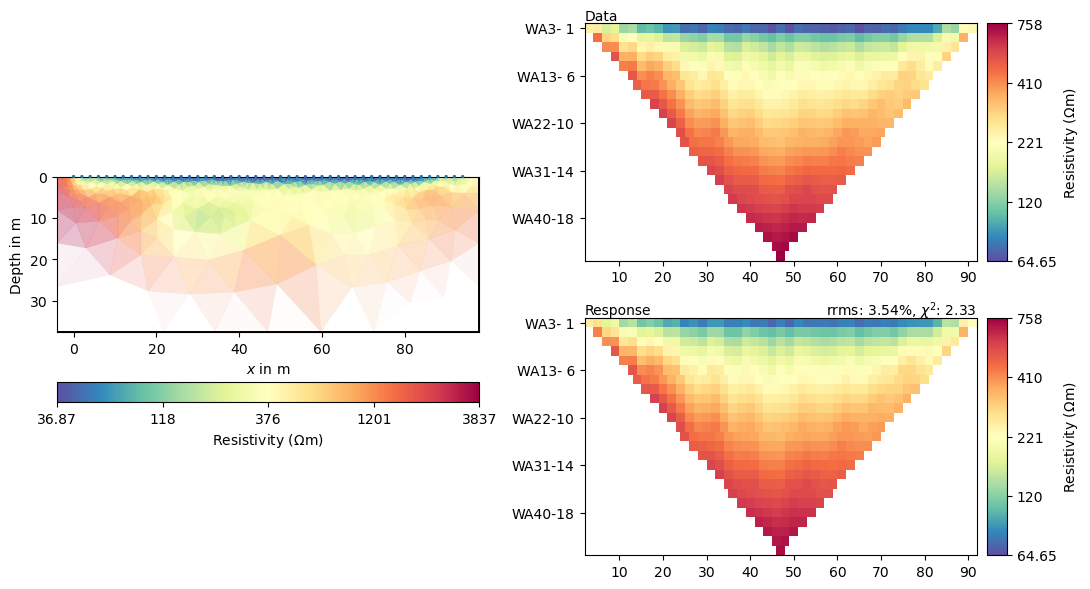

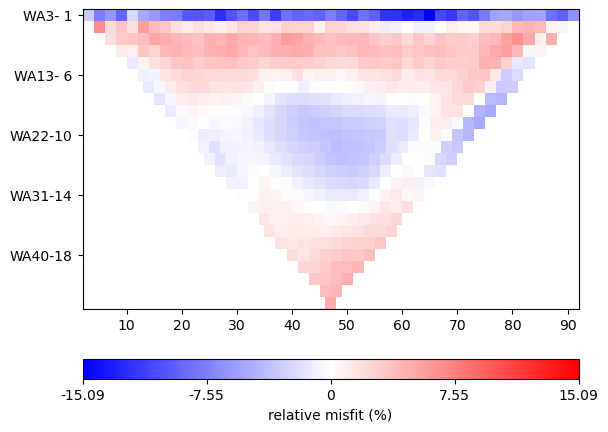

In [22]:
mgr = ert.Manager(data)


mgr.invert(data, verbose=True, optimizeLambda=True)

mgr.showResultAndFit()
mgr.showMisfit()

29/10/25 - 10:08:11 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 10:08:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 10:08:11 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 10:08:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 10:08:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/10/25 - 10:08:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/10/25 - 10:08:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2222 Cells: 4164 Boundaries: 3262
29/10/25 - 10:08:12 - pyGIMLi - INFO - Use median(data values)=291.974
29/10/25 - 10:08:12 - pyGIMLi - INFO - Created startmodel from forward operator:780, min/max=291.974000/291.974000
29/10/25 - 10:08:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C97FE18900>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 64.65/758
min/max (error): 1.82%/3.99%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  615.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   32.63 (dPhi = 94.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.26 (dPhi = 15.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   17.74 (dPhi = 31.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.35 (dPhi = 72.87%) lam: 20.0
-------------------------------------------------

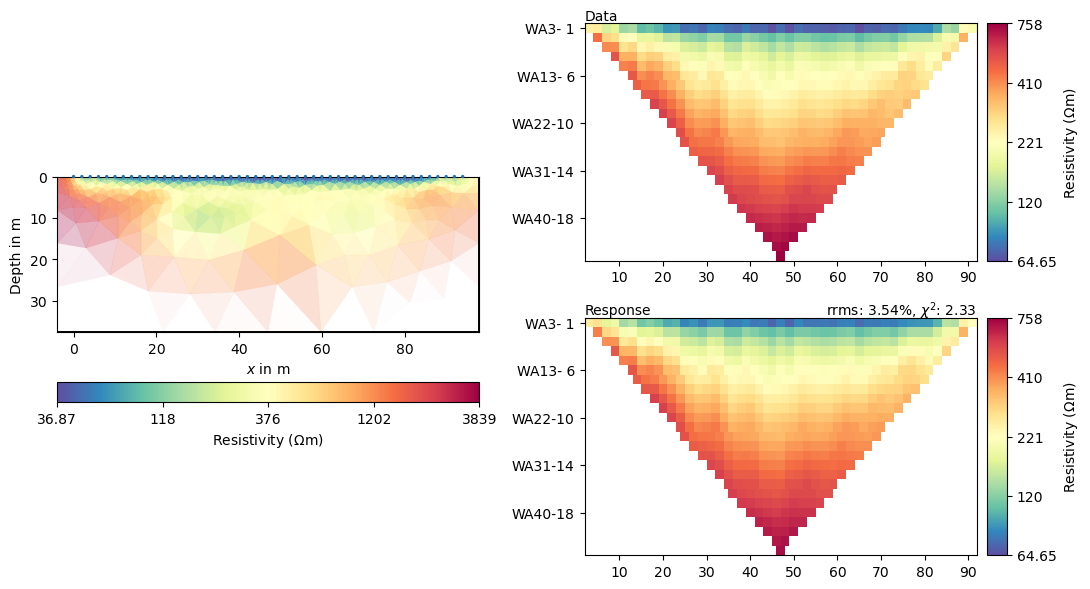

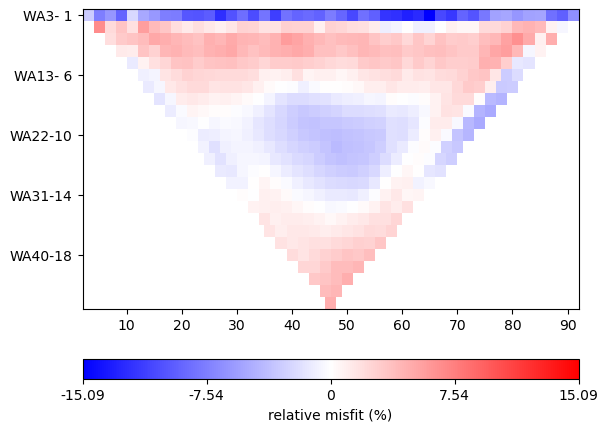

In [19]:

mgr = ert.Manager(data)


mgr.invert(data, verbose=True, runChi1=True)

mgr.showResultAndFit()
mgr.showMisfit()

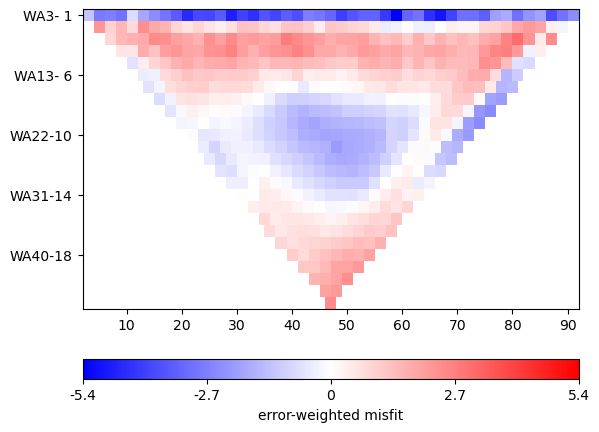

In [20]:
mgr.showMisfit(errorWeighted=True)

06/10/25 - 11:26:40 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 11:26:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 11:26:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 11:26:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/10/25 - 11:26:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 14620 Cells: 28972 Boundaries: 21862
06/10/25 - 11:26:42 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 11:26:42 - pyGIMLi - INFO - Created startmodel from forward operator:6253, min/max=291.974000/291.974000
06/10/25 - 11:26:42 - pyGIMLi - INFO - Starting inversion.
06/10/25 - 11:26:54 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 2 with: I=[40, 2], dip=0, strike=0


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F3D5615030>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 1.82%/3.99%
min/max (start model): 292/292
--------------------------------------------------------------------------------


06/10/25 - 11:32:22 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition 321.9s
06/10/25 - 11:32:23 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\7461231614358166566


inv.iter 0 ... chi² =  615.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  112.77 (dPhi = 81.29%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   52.69 (dPhi = 51.93%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.23 (dPhi = 91.42%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.81 (dPhi = 11.78%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =    1.49 (dPhi = 8.62%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 6 ... chi² =    1.47 (dPhi = 0.93%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.93 (< 2.0%)       

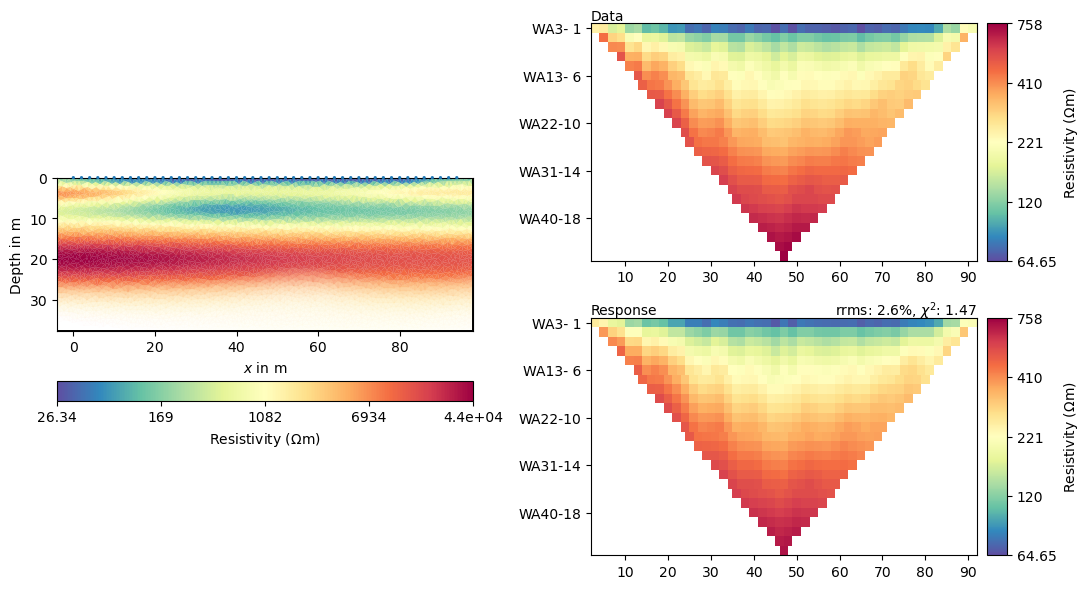

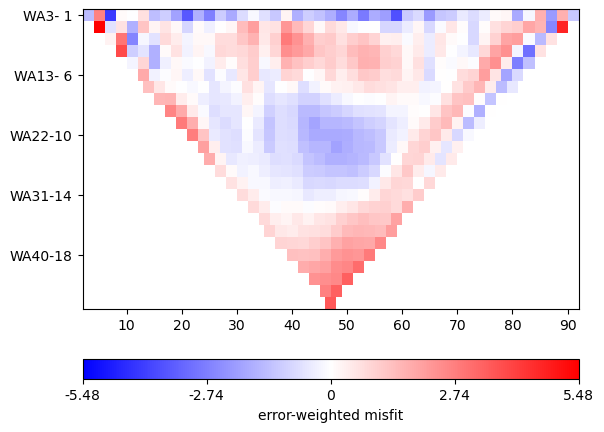

In [112]:
mgr = ert.Manager(data)
mgr.setMesh(mesh)
mgr.inv.setRegularization(2, correlationLengths=[40, 2])
mgr.invert(data, verbose=True, zWeight=0.1, lam=50)
mgr.showResultAndFit()
mgr.showMisfit(errorWeighted=True)

06/10/25 - 09:57:05 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:57:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:57:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:57:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/10/25 - 09:57:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 09:57:05 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:57:05 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:57:05 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   20.33 (dPhi = 92.26%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.75 (dPhi = 63.84%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.15 (dPhi = 73.55%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.02 (dPhi = 4.31%) 

06/10/25 - 09:57:51 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:57:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:57:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    1.02 (dPhi = 0.00%) lam: 1000.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


06/10/25 - 09:57:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 09:57:52 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:57:52 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:57:52 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   19.28 (dPhi = 92.73%) lam: 599.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.01 (dPhi = 61.71%) lam: 599.5
--------------------------------------------------------------------------------
inv.iter 3 ... 

06/10/25 - 09:58:21 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:58:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:58:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:58:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.88 (dPhi = 79.93%) lam: 599.5


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.88)                   #
################################################################################


06/10/25 - 09:58:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 09:58:22 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:58:22 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:58:22 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   18.79 (dPhi = 93.00%) lam: 359.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.07 (dPhi = 61.13%) lam: 359.4
--------------------------------------------------------------------------------
inv.iter 3 ... 

06/10/25 - 09:58:50 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:58:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:58:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:58:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/10/25 - 09:58:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464


chi² =    0.72 (dPhi = 83.63%) lam: 359.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################


06/10/25 - 09:58:50 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:58:50 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:58:50 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   18.99 (dPhi = 92.99%) lam: 215.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.56 (dPhi = 59.42%) lam: 215.4
--------------------------------------------------------------------------------
inv.iter 3 ... 

06/10/25 - 09:59:19 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:59:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:59:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:59:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.88 (dPhi = 83.80%) lam: 215.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.88)                   #
################################################################################


06/10/25 - 09:59:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 09:59:19 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:59:19 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:59:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   19.59 (dPhi = 92.82%) lam: 129.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.44 (dPhi = 56.44%) lam: 129.2
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.64 (dPhi = 77.56%) lam: 129.2
--------------------------------------------------------------------------------
inv.iter 4 ... 

06/10/25 - 09:59:55 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 09:59:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 09:59:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 09:59:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.45 (dPhi = 63.16%) lam: 129.2


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.45)                   #
################################################################################


06/10/25 - 09:59:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 09:59:55 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 09:59:55 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 09:59:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   20.89 (dPhi = 92.39%) lam: 77.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.29 (dPhi = 55.25%) lam: 77.4
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.77 (dPhi = 68.16%) lam: 77.4
--------------------------------------------------------------------------------
inv.iter 4 ... 

06/10/25 - 10:00:31 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 10:00:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 10:00:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 10:00:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.35 (dPhi = 81.72%) lam: 77.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.35)                   #
################################################################################


06/10/25 - 10:00:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 10:00:31 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 10:00:31 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 10:00:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   22.12 (dPhi = 91.98%) lam: 46.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.78 (dPhi = 55.57%) lam: 46.4
--------------------------------------------------------------------------------
inv.iter 3 ... 

06/10/25 - 10:01:06 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 10:01:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 10:01:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 10:01:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    3.81 (dPhi = 59.62%) lam: 46.4
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.29 (dPhi = 88.89%) lam: 46.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.29)                   #
################################################################################


06/10/25 - 10:01:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 10:01:07 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 10:01:07 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 10:01:07 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   22.42 (dPhi = 91.89%) lam: 27.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.97 (dPhi = 55.38%) lam: 27.8
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.21 (dPhi = 56.82%) lam: 27.8
--------------------------------------------------------------------------------
inv.iter 4 ... 

06/10/25 - 10:01:52 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 10:01:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 10:01:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 10:01:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.22 (dPhi = 92.13%) lam: 27.8


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.22)                   #
################################################################################


06/10/25 - 10:01:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 10:01:53 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 10:01:53 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 10:01:53 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   22.58 (dPhi = 91.84%) lam: 16.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.92 (dPhi = 51.55%) lam: 16.7
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.80 (dPhi = 55.47%) lam: 16.7
--------------------------------------------------------------------------------
inv.iter 4 ... 

06/10/25 - 10:02:34 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 10:02:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 10:02:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 10:02:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² =    0.23 (dPhi = 93.15%) lam: 16.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.23)                   #
################################################################################


06/10/25 - 10:02:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4361 Cells: 8416 Boundaries: 6464
06/10/25 - 10:02:35 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 10:02:35 - pyGIMLi - INFO - Created startmodel from forward operator:1665, min/max=291.974000/291.974000
06/10/25 - 10:02:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F440DD1EE0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 3.06%/3.95%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  278.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   23.66 (dPhi = 91.46%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.24 (dPhi = 48.21%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.33 (dPhi = 56.04%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.28 (dPhi = 93.14%) lam: 

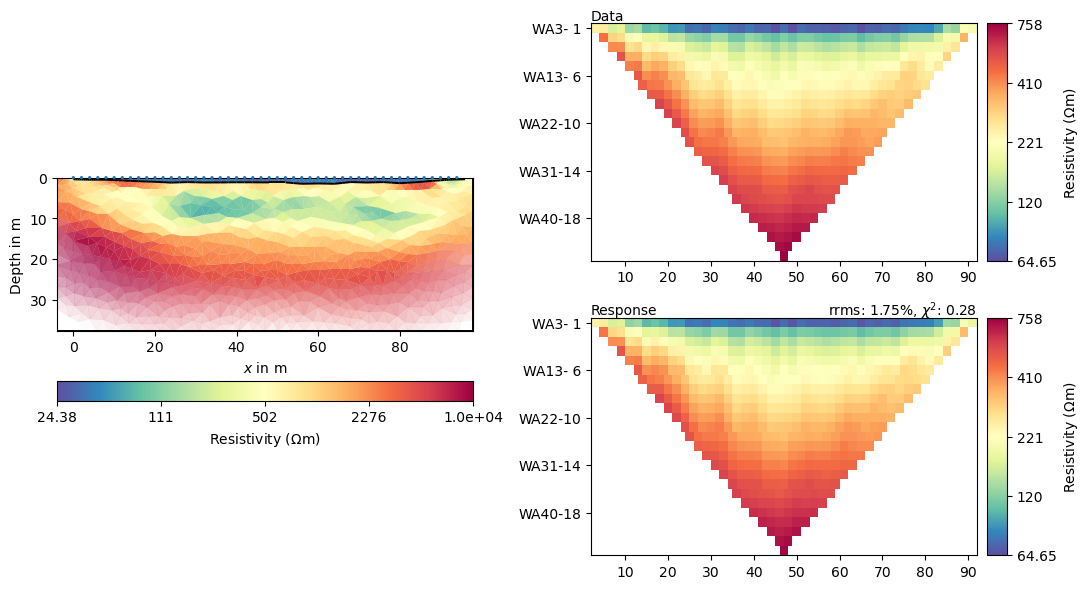

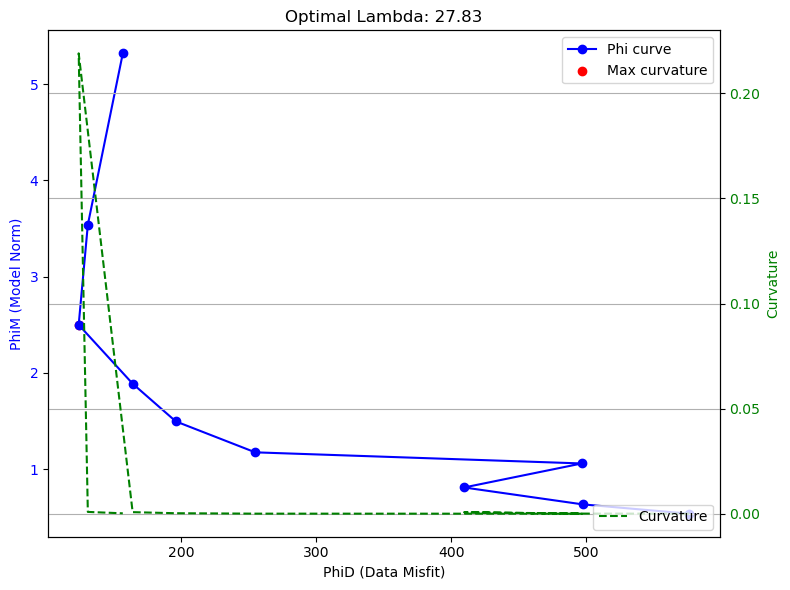

In [47]:
lambdas = np.logspace(np.log10(1000), np.log10(10), num=10)

phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True, mesh=mesh, zWeight=0.1)
    
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())


mgr.showResultAndFit()

phiD = np.array(phiD)
phiM = np.array(phiM)
dphiD = np.gradient(phiD, lambdas)  # First derivative of phiD w.r.t. lambdas
dphiM = np.gradient(phiM, lambdas)  # First derivative of phiM w.r.t. lambdas
ddphiD = np.gradient(dphiD, lambdas)  # Second derivative of phiD
ddphiM = np.gradient(dphiM, lambdas)  # Second derivative of phiM

# Compute curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Find maximum curvature
max_curvature_index = np.argmax(curvature)
optimal_lambda = lambdas[max_curvature_index]

# Plot Phi curve and curvature
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Phi curve
ax1.plot(phiD, phiM, '-o', label='Phi curve', color='blue')
ax1.scatter(phiD[max_curvature_index], phiM[max_curvature_index], color='red', label='Max curvature')
ax1.set_xlabel('PhiD (Data Misfit)')
ax1.set_ylabel('PhiM (Model Norm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper right')

# Add curvature plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(phiD, curvature, '--', label='Curvature', color='green')
ax2.set_ylabel('Curvature', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')

plt.title(f'Optimal Lambda: {optimal_lambda:.2f}')
plt.grid()
plt.tight_layout()
plt.show()

2.5
123.818
[27.82559402]


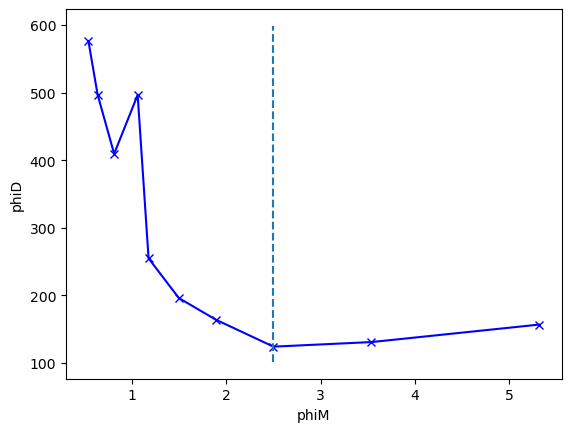

In [48]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=2)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [52]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM_clean, phiD_clean, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas_clean[np.where(phiM_clean==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM_clean, phiD_clean, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

NameError: name 'phiM_clean' is not defined

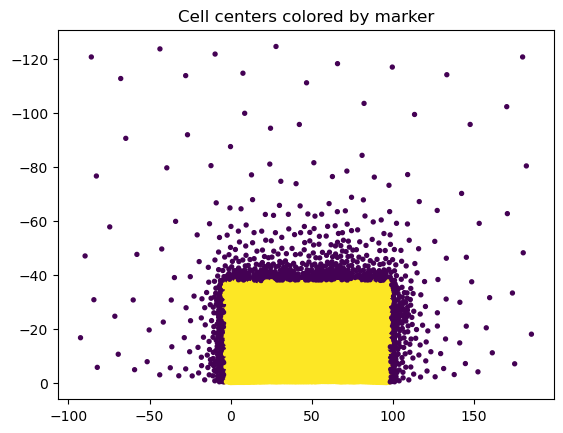

In [53]:
centers = [c.center() for c in mesh.cells()]
xs = [p.x() for p in centers]
ys = [p.y() for p in centers]   # y usually depth; check sign/axis orientation
import matplotlib.pyplot as plt
plt.scatter(xs, ys, c=[c.marker() for c in mesh.cells()], s=8)
plt.gca().invert_yaxis()
plt.title("Cell centers colored by marker")
plt.show()


In [ ]:
np.mean(data['rhoa'])

06/10/25 - 14:55:11 - pyGIMLi - INFO - Found 2 regions.
06/10/25 - 14:55:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/10/25 - 14:55:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/10/25 - 14:55:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/10/25 - 14:55:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 14620 Cells: 28972 Boundaries: 21862
06/10/25 - 14:55:12 - pyGIMLi - INFO - Use median(data values)=291.974
06/10/25 - 14:55:12 - pyGIMLi - INFO - Created startmodel from forward operator:6253, min/max=291.974000/291.974000
06/10/25 - 14:55:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F4413EA2A0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 64.65/758
min/max (error): 1.82%/3.99%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  615.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   32.32 (dPhi = 93.82%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   21.42 (dPhi = 30.74%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.29 (dPhi = 63.11%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.33 (dPhi = 0.29%) lam: 50.0
##################################################

Text(74.26141400709274, 0.5, 'y (m)')

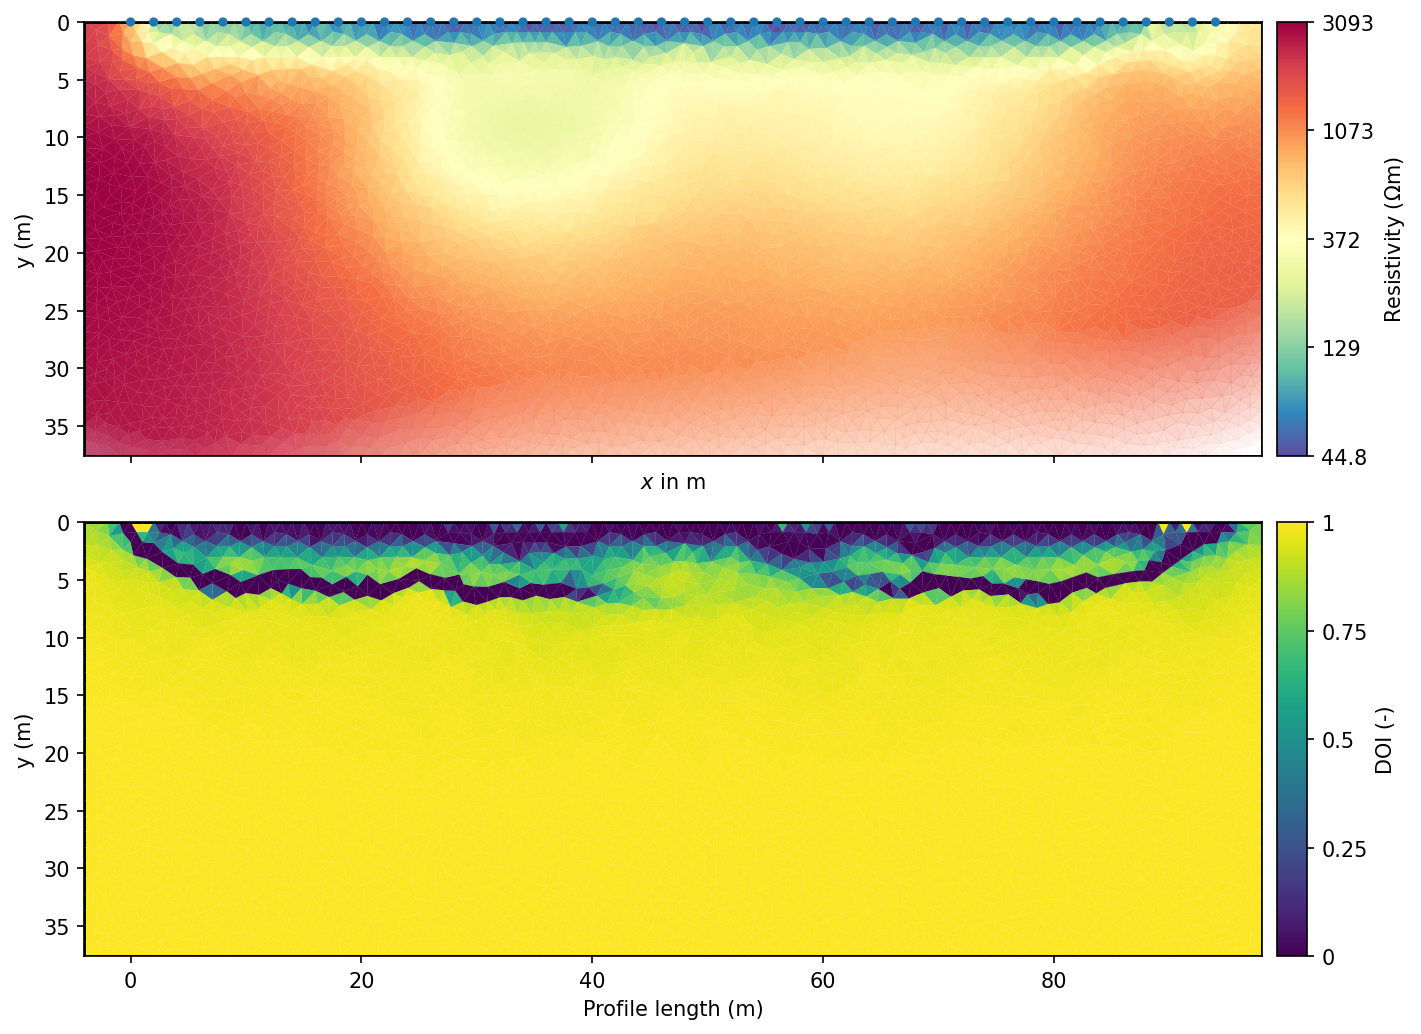

In [158]:
inv = mgr.invert(lam=50, verbose=True, paraDX=0.25, paraDZ=0.25, mesh=mesh)
def run_inv(referencemodel):
    # Set reference model as startmodel
    mgr.inv.inv.setModel(referencemodel)

    # Set reference model
    rm = mgr.inv.fop.regionManager()
    rm.setConstraintType(10) # 0 = reference model, 1 = first-order smoothing (default), 10 = both
    rm.fillConstraints(mgr.inv.fop.constraints())
    mgr.inv.inv.setReferenceModel(referencemodel)
    model = mgr.inv.inv.run()
    return model

def compute_DOI(ref1, ref2):
    m1 = run_inv(ref1)
    m2 = run_inv(ref2)

    R = (m1 - m2) / (m1r - m2r)
    return R


m1r = np.ones(mgr.paraDomain.cellCount()) * (np.mean(data['rhoa'])/10)
m2r = np.ones(mgr.paraDomain.cellCount()) * (np.mean(data['rhoa'])*10)

DOI = compute_DOI(m1r, m2r)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,7), dpi=150, sharex=True)

mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax2, cMin=0, cMax=1, orientation="vertical", label="DOI (-)")
ax2.set_xlabel("Profile length (m)")
ax2.set_ylabel("y (m)")

In [1]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,7), dpi=150, sharex=True)

mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax2, cMin=0, cMax=1, orientation="vertical", label="DOI (-)")
ax2.set_xlabel("Profile length (m)")
ax2.set_ylabel("y (m)")

NameError: name 'plt' is not defined

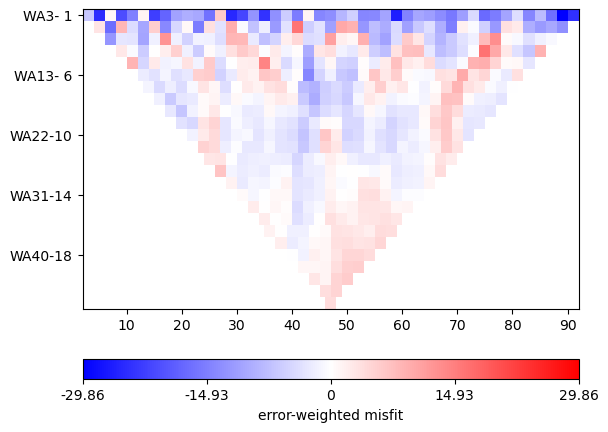

In [159]:
mgr.showMisfit(errorWeighted=True)

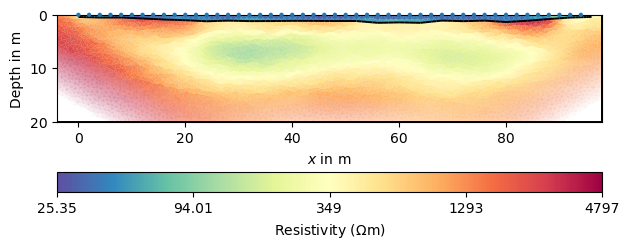

In [179]:
ax, cb = mgr.showResult()

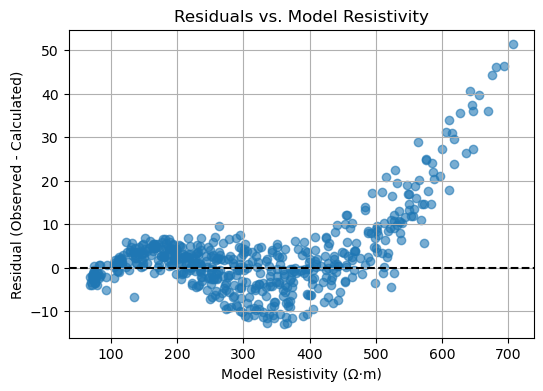

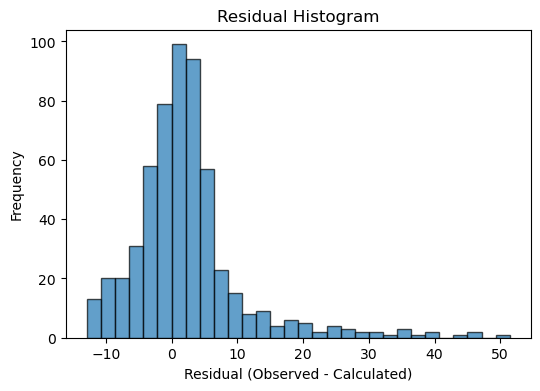

In [56]:
d_calc = mgr.inv.response.array()  # calculated apparent resistivity
d_obs = mgr.data['rhoa']
residuals = d_obs - d_calc


plt.figure(figsize=(6,4))
plt.scatter(d_calc, residuals, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Model Resistivity (Ω·m)')
plt.ylabel('Residual (Observed - Calculated)')
plt.title('Residuals vs. Model Resistivity')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residual (Observed - Calculated)')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

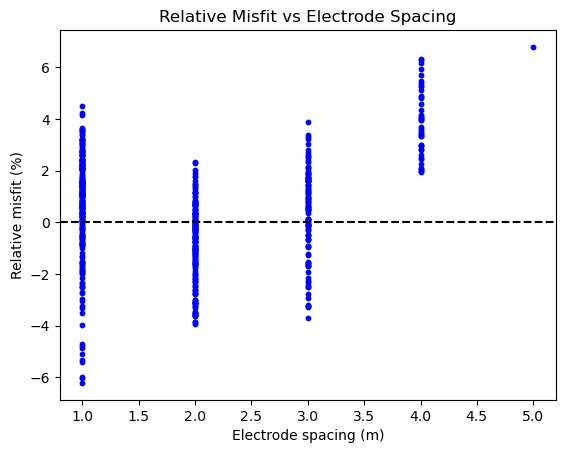

In [57]:
spacing = np.abs(data["a"] - data["b"])
rel_misfit = (d_obs - d_calc) / d_obs * 100
plt.scatter(spacing, rel_misfit, s=10, c="b")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Electrode spacing (m)")
plt.ylabel("Relative misfit (%)")
plt.title("Relative Misfit vs Electrode Spacing")
plt.show()

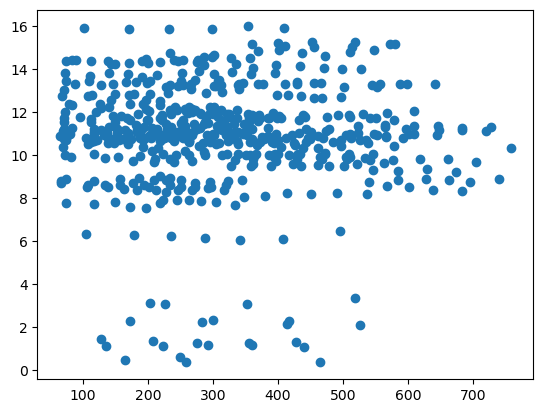

In [290]:
extra = pd.read_csv(dir + 'tuk_e20_h1.csv')
plt.scatter(extra["rho"], extra['U(Tx)'])

In [288]:
extra = pd.read_csv(dir + 'tuk_e20_h1.csv')
extra

,num;A;B;M;N;I;U;dU;U90;dU90;rho;phi;f;n;nAB;Profile;Spread;PseudoZ;X;Y;Z;Date;Time;U(Tx)\r\n ;;;;;mA;mV;%;mV;%;Ohmm;mrad;Hz;;;m;m;m;m;m;m;yyyy.mm.dd;hh:mm:ss.ss;V
0,1;2;3;1;4;1.0000;19.84075;0.025;0.06150;0.231;...
1,2;3;4;2;5;1.0000;20.54215;0.031;0.06110;24.882...
2,3;3;4;1;6;1.0000;12.31050;0.093;0.01000;219.20...
3,4;4;5;3;6;1.0000;13.03800;0.020;0.04460;6.500;...
4,5;4;5;2;7;5.0000;39.68835;0.023;0.14300;1.829;...
...,...
560,561;44;45;42;47;15.0000;78.10895;0.024;0.18025...
561,562;44;45;41;48;15.0000;54.09840;0.010;0.08575...
562,563;45;46;44;47;5.0000;89.94334;0.059;0.30410;...
563,564;45;46;43;48;5.0000;46.79025;0.009;0.09285;...
